# 데이터셋 설명
- 태아 건강과 관련된 레코드
- 'fetal_health'는 3개의 클래스로 분류됨 (1~3)
- Normal, Suspect, Pathological

# train, test 파일 로드

In [46]:
import pandas as pd

train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

train.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,130.0,0.006,0.000,0.006,0.000,0.0,0.0,38.0,1.0,0.0,...,102.0,155.0,6.0,1.0,136.0,135.0,137.0,4.0,0.0,1.0
1,122.0,0.000,0.000,0.001,0.000,0.0,0.0,26.0,1.3,4.0,...,106.0,136.0,1.0,0.0,126.0,122.0,125.0,3.0,0.0,1.0
2,122.0,0.005,0.000,0.006,0.000,0.0,0.0,32.0,1.1,12.0,...,83.0,148.0,2.0,1.0,125.0,125.0,126.0,4.0,0.0,1.0
3,145.0,0.003,0.000,0.006,0.000,0.0,0.0,48.0,0.7,2.0,...,133.0,171.0,2.0,0.0,160.0,159.0,160.0,2.0,1.0,1.0
4,142.0,0.002,0.054,0.001,0.007,0.0,0.0,64.0,4.0,0.0,...,67.0,210.0,9.0,2.0,142.0,109.0,150.0,54.0,0.0,1.0


# EDA

In [47]:
train.info()
train.describe()

# 결측치 x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          1690 non-null   float64
 1   accelerations                                           1690 non-null   float64
 2   fetal_movement                                          1690 non-null   float64
 3   uterine_contractions                                    1690 non-null   float64
 4   light_decelerations                                     1690 non-null   float64
 5   severe_decelerations                                    1690 non-null   float64
 6   prolongued_decelerations                                1690 non-null   float64
 7   abnormal_short_term_variability                         1690 non-null   float64
 8   mean_value_of_short_term_variability  

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,...,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000,1690.000000
mean,133.364497,0.003182,0.009655,0.004427,0.001884,0.000004,0.000163,47.227219,1.325621,10.313018,...,94.428994,163.846154,4.023669,0.323077,137.501183,134.730178,138.138462,18.465680,0.309467,1.314793
std,9.922061,0.003889,0.047682,0.002945,0.002971,0.000064,0.000601,17.337945,0.894917,18.826518,...,29.677485,17.875201,2.927893,0.700841,16.259961,15.584202,14.506478,27.857271,0.613229,0.624415
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,75.000000,78.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.005000,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,...,95.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,141.000000,0.006000,0.002750,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,12.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,146.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.000000,...,159.000000,238.000000,18.000000,10.000000,186.000000,180.000000,183.000000,250.000000,1.000000,3.000000


In [48]:
test.info()
test.describe()

# 결측치 x, label값(fetal_health) x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          423 non-null    float64
 1   accelerations                                           423 non-null    float64
 2   fetal_movement                                          423 non-null    float64
 3   uterine_contractions                                    423 non-null    float64
 4   light_decelerations                                     423 non-null    float64
 5   severe_decelerations                                    423 non-null    float64
 6   prolongued_decelerations                                423 non-null    float64
 7   abnormal_short_term_variability                         423 non-null    float64
 8   mean_value_of_short_term_variability    

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.0,423.000000,423.000000,423.000000,423.000000,...,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,133.066194,0.003213,0.008967,0.004227,0.001969,0.0,0.000144,46.061466,1.372577,7.725768,...,75.002364,90.111111,165.113475,4.290780,0.335697,137.267139,134.078014,137.893617,20.671395,0.354610
std,9.499582,0.003805,0.043166,0.002920,0.002944,0.0,0.000551,16.509397,0.840872,16.089662,...,39.060319,28.874454,18.208154,3.038939,0.735574,16.976204,15.722446,14.383888,33.322612,0.601752
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,12.000000,0.200000,0.000000,...,5.000000,50.000000,125.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.0,0.000000,32.000000,0.800000,0.000000,...,41.000000,65.000000,153.000000,2.000000,0.000000,129.000000,125.000000,129.000000,3.000000,0.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.0,0.000000,46.000000,1.200000,0.000000,...,75.000000,86.000000,163.000000,4.000000,0.000000,140.000000,136.000000,139.000000,8.000000,0.000000
75%,140.000000,0.006000,0.003000,0.006000,0.003000,0.0,0.000000,60.000000,1.700000,7.500000,...,103.000000,114.500000,175.000000,6.000000,0.500000,148.000000,144.500000,147.000000,24.500000,1.000000
max,159.000000,0.018000,0.455000,0.012000,0.015000,0.0,0.004000,86.000000,6.000000,84.000000,...,176.000000,158.000000,238.000000,16.000000,8.000000,187.000000,182.000000,186.000000,269.000000,1.000000


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

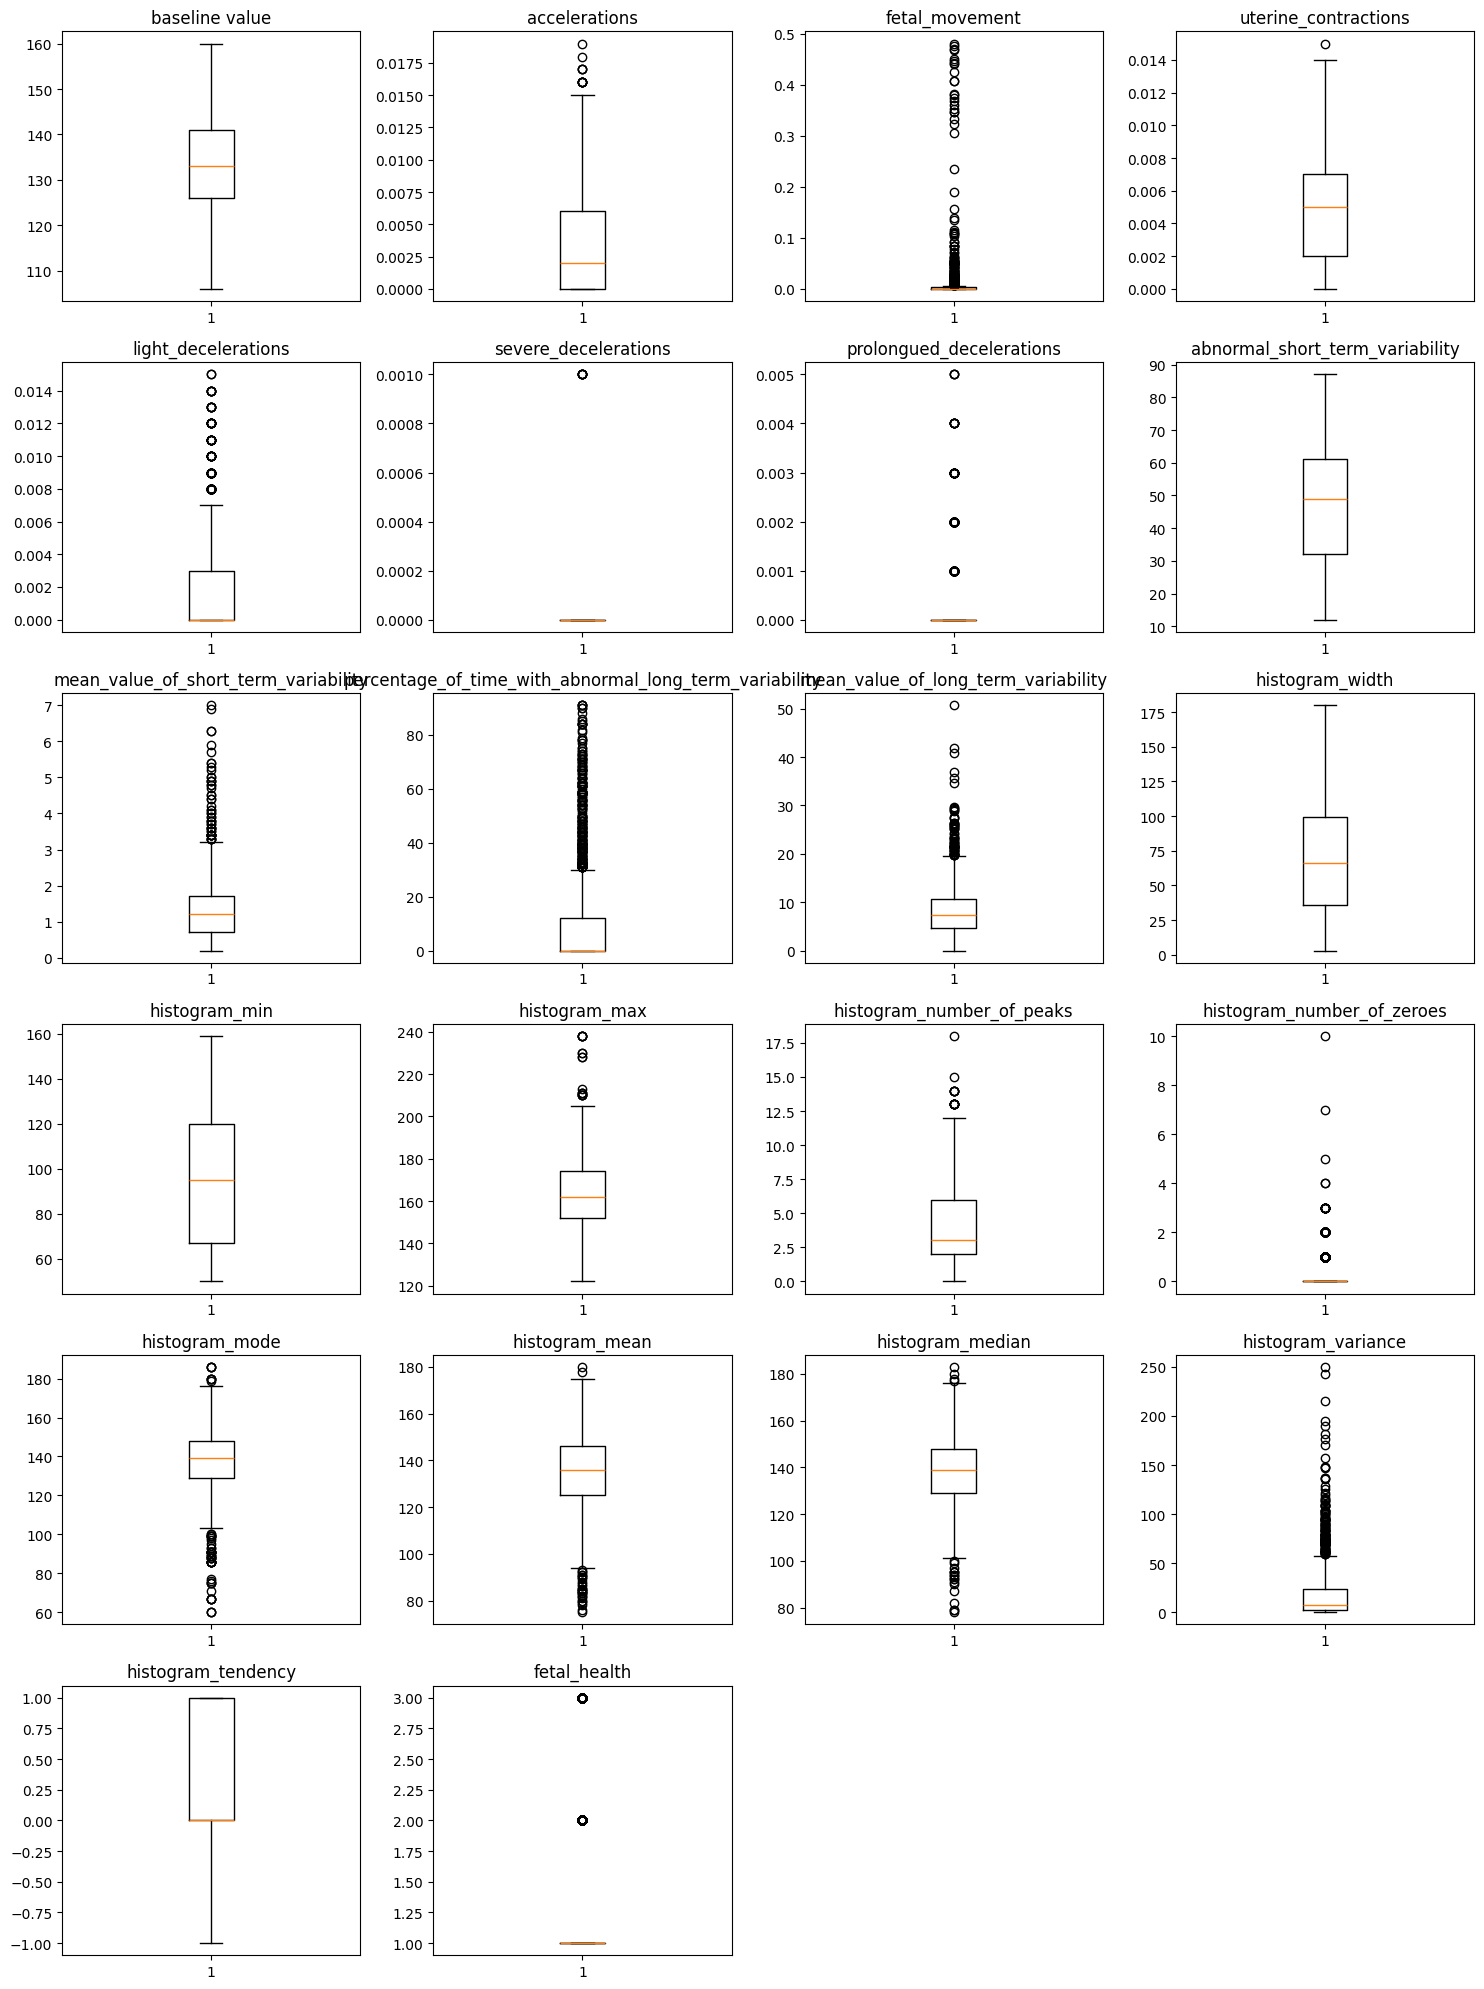

In [50]:
fig,axes = plt.subplots(6,4, figsize=(15,20))
axes = axes.flatten()

# boxplot을 그리세요
for i, column in enumerate(train.columns):
  axes[i].boxplot(train[column])
  axes[i].set_title(column)

for i in range(len(train.columns),len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

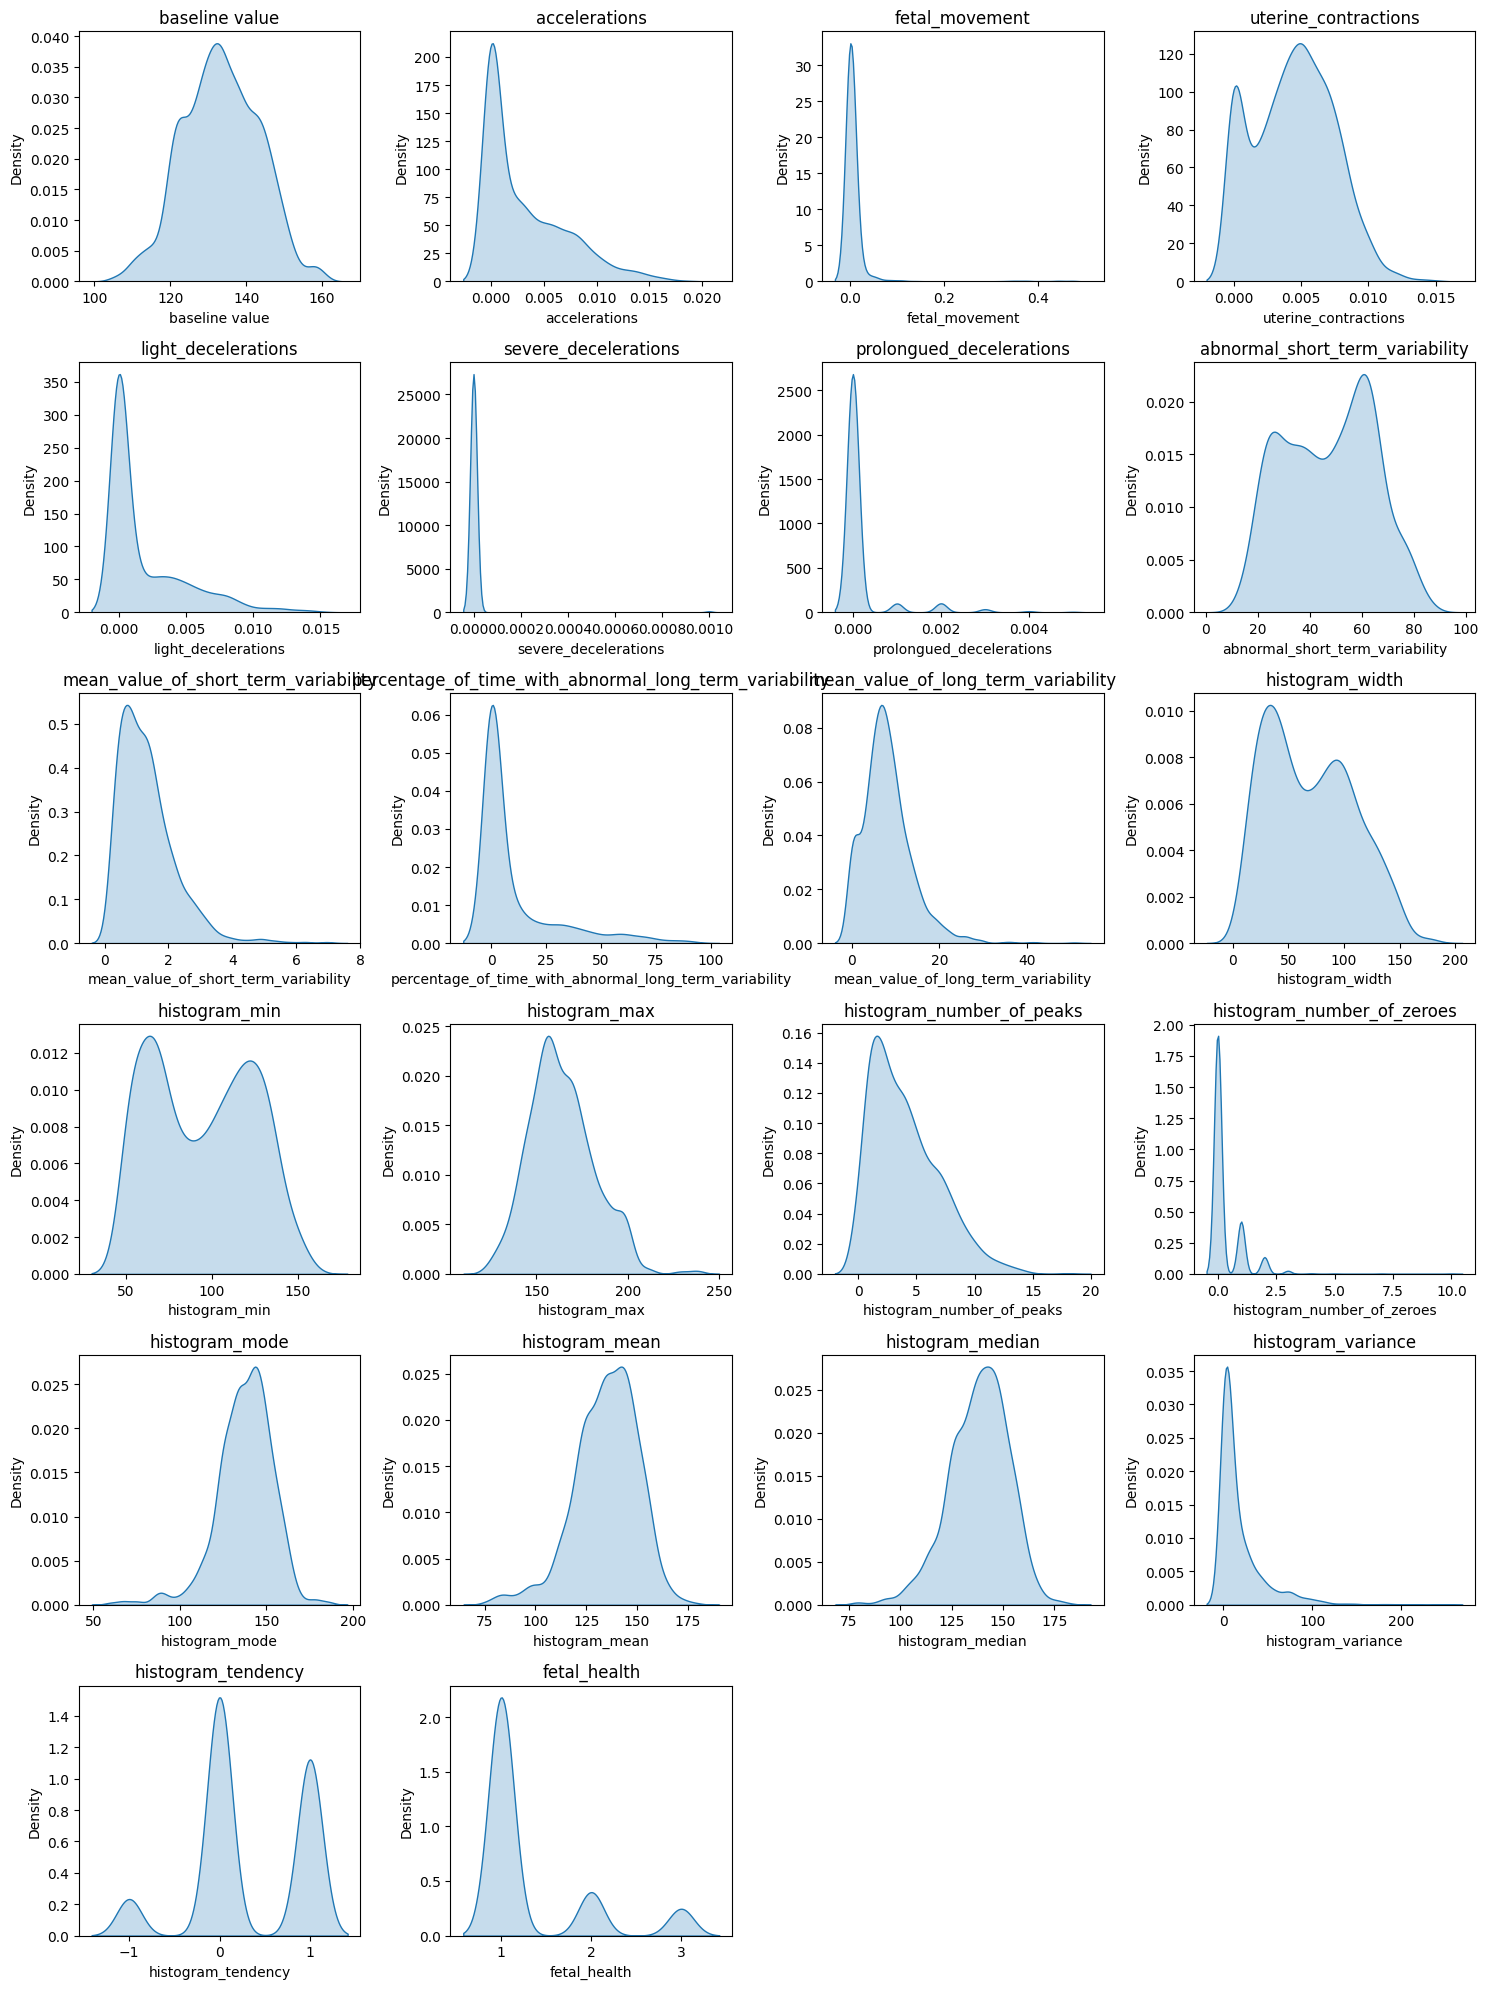

In [51]:
fig,axes = plt.subplots(6,4, figsize=(15,20))
axes = axes.flatten()

# kde plot을 그리세요
for i, column in enumerate(train.columns):
  sns.kdeplot(data=train, x=column, ax=axes[i], fill=True)
  axes[i].set_title(column)

for i in range(len(train.columns),len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

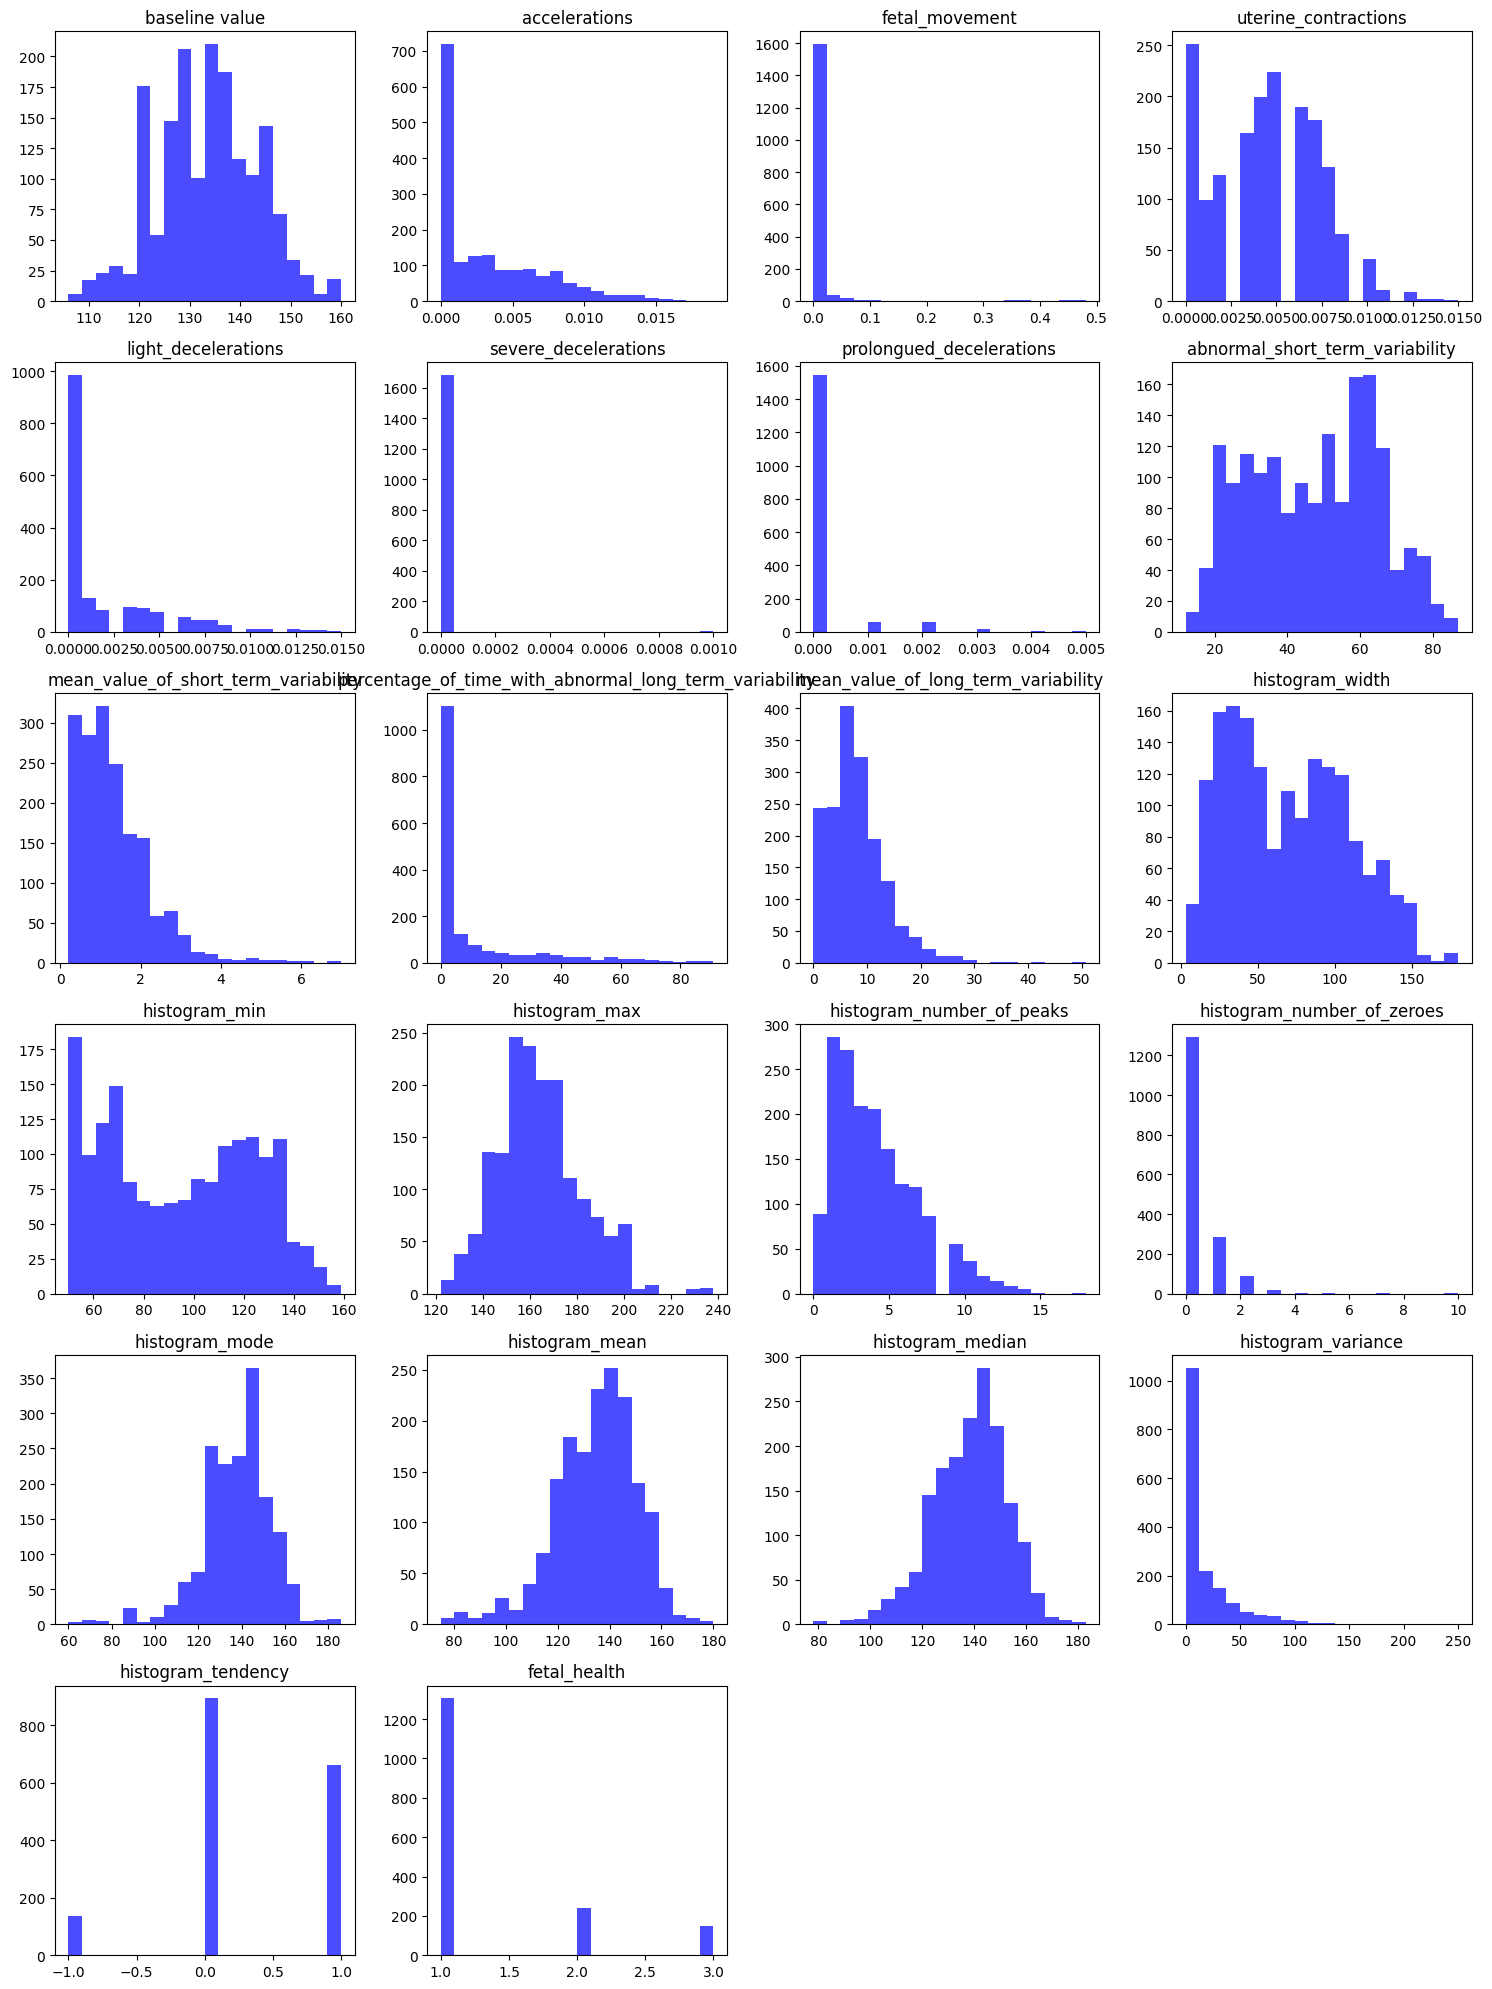

In [52]:
fig,axes = plt.subplots(6,4, figsize=(15,20))
axes = axes.flatten()

# hist plot을 그리세요
for i, column in enumerate(train.columns):
  axes[i].hist(train[column], bins=20, color='blue', alpha=0.7)
  axes[i].set_title(column)

for i in range(len(train.columns),len(axes)):
  fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# 데이터 전처리
- 중복값
- 인코딩
- 이상치

In [53]:
# 데이터에 중복값이 있는지 확인하세요
train.duplicated()#코드추가
duplicates = train.duplicated()

# Print the result
print("Duplicate rows in the DataFrame:")
print(duplicates)

# Optional: Print the number of duplicate rows
print("Number of duplicate rows:", duplicates.sum())

# Optional: Show only the duplicate rows
if duplicates.any():
    print("Duplicate entries in the DataFrame:")
    print(train[duplicates])

Duplicate rows in the DataFrame:
0       False
1       False
2       False
3       False
4       False
        ...  
1685    False
1686    False
1687    False
1688    False
1689    False
Length: 1690, dtype: bool
Number of duplicate rows: 0


In [54]:

# Convert 'fetal_health' column from float to int
train['fetal_health'] = train['fetal_health'].astype(int)

# Print the DataFrame to verify the change
print(train)

      baseline value  accelerations  fetal_movement  uterine_contractions  \
0              130.0          0.006           0.000                 0.006   
1              122.0          0.000           0.000                 0.001   
2              122.0          0.005           0.000                 0.006   
3              145.0          0.003           0.000                 0.006   
4              142.0          0.002           0.054                 0.001   
...              ...            ...             ...                   ...   
1685           132.0          0.007           0.000                 0.010   
1686           122.0          0.000           0.000                 0.003   
1687           122.0          0.004           0.000                 0.005   
1688           138.0          0.002           0.000                 0.007   
1689           136.0          0.007           0.000                 0.005   

      light_decelerations  severe_decelerations  prolongued_decelerations  

In [28]:
# 이상치 처리를 수행하세요 (선택사항)

def outlier(df):
    # Compute the IQR for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the bounds for detecting outliers
    line_down = Q1 - 1.5 * IQR
    line_up = Q3 + 1.5 * IQR

    # Clip values outside this range into the range [line_down, line_up]
    df = df.clip(lower=line_down, upper=line_up, axis=1)
    return df

outlier(train)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,130.0,0.006,0.000000,0.006,0.0000,0.0,0.0,38.0,1.0,0.0,...,102.0,155.0,6.0,0.0,136.0,135.0,137.0,4.0,0.0,1
1,122.0,0.000,0.000000,0.001,0.0000,0.0,0.0,26.0,1.3,4.0,...,106.0,136.0,1.0,0.0,126.0,122.0,125.0,3.0,0.0,1
2,122.0,0.005,0.000000,0.006,0.0000,0.0,0.0,32.0,1.1,12.0,...,83.0,148.0,2.0,0.0,125.0,125.0,126.0,4.0,0.0,1
3,145.0,0.003,0.000000,0.006,0.0000,0.0,0.0,48.0,0.7,2.0,...,133.0,171.0,2.0,0.0,160.0,159.0,160.0,2.0,1.0,1
4,142.0,0.002,0.006875,0.001,0.0070,0.0,0.0,64.0,3.2,0.0,...,67.0,207.0,9.0,0.0,142.0,109.0,150.0,54.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,132.0,0.007,0.000000,0.010,0.0075,0.0,0.0,56.0,2.8,0.0,...,70.0,186.0,5.0,0.0,106.0,115.0,133.0,57.0,-1.0,1
1686,122.0,0.000,0.000000,0.003,0.0000,0.0,0.0,21.0,2.2,0.0,...,104.0,143.0,4.0,0.0,129.0,126.0,128.0,4.0,0.0,1
1687,122.0,0.004,0.000000,0.005,0.0040,0.0,0.0,22.0,1.7,0.0,...,74.0,143.0,3.0,0.0,133.0,122.0,127.0,26.0,1.0,1
1688,138.0,0.002,0.000000,0.007,0.0050,0.0,0.0,32.0,1.1,16.0,...,97.0,175.0,5.0,0.0,145.0,139.0,144.0,16.0,0.0,1


# train - test

In [55]:
from sklearn.model_selection import train_test_split
# Prepare the features (X) and target (y)
X = train.drop('fetal_health', axis=1)  # Drop the target column to create the feature set
y = train['fetal_health']  # Target column

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Print the shapes of the training sets to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (1183, 21)
y_train shape: (1183,)


In [56]:
# scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# 모델링
- random_state = 123 고정 사용
---
- 의사결정나무
- 랜덤포레스트
- KNN
- 서포트벡터머신
- 그라디언트 부스팅
- 로지스틱회귀

- 그리드서치로 파라미터 튜닝


## 의사결정나무

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

dt_clf = DecisionTreeClassifier(random_state = 123)
dt_clf = dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

accuracy_dt = accuracy_score(y_test, dt_pred)
f1_dt = f1_score(y_test, dt_pred, average='weighted')
print('Accuracy :', round(accuracy_dt,4))
print('f1-score :', round(f1_dt,4))

Accuracy : 0.8797
f1-score : 0.8813


In [58]:
# 의사결정나무 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params= {
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum number of levels in the tree
    'min_samples_split': [2, 10, 20],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10] 
} 

dtree = DecisionTreeClassifier(random_state=123)
grid_cv = GridSearchCV(dtree, params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_cv.fit(X_train, y_train)

best_params = grid_cv.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"GridSarchCV highest Accuracy: {accuracy}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
GridSarchCV highest Accuracy: 0.8954635108481263


## 랜덤포레스트

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 123)
rf_clf = rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred, average='weighted')
print('Accuracy :', round(accuracy_rf,4))
print('f1-score :', round(f1_rf,4))

Accuracy : 0.929
f1-score : 0.9262


In [60]:
# 랜덤포레스트 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [None, 10, 20, 30, 40],  # Maximum depth of the tree
    'max_leaf_nodes': [None, 50, 100, 200],  # Max number of leaf nodes in the tree
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    
}
#원하는 파라미터가 있다면 자율적으로 추가하여 진행하세요
# Initialize a RandomForestClassifier
random_forest = RandomForestClassifier(random_state=123)

# Create the GridSearchCV object
grid_cv = GridSearchCV(random_forest, params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)


grid_cv.fit(X_train, y_train)

best_params = grid_cv.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"GridSarchCV highest Accuracy: {accuracy}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None}
GridSarchCV highest Accuracy: 0.9289940828402367


/Users/forwarder1121/anaconda3/envs/ossp1-2401/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/forwarder1121/anaconda3/envs/ossp1-2401/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/forwarder1121/anaconda3/envs/ossp1-2401/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/forwarder1121/anaconda3/envs/ossp1-2401/lib/python3.11/site-packages/s

## K-Nearest Neighbours (KNN)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, knn_pred)
f1_knn = f1_score(y_test, knn_pred, average='weighted')
print('Accuracy :', round(accuracy_knn,4))
print('f1-score :', round(f1_knn,4))

Accuracy : 0.8876
f1-score : 0.882


In [62]:
# KNN 파라미터 튜닝

params = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Number of neighbors to use
    'metric': ['euclidean', 'manhattan', 'minkowski'],  # Distance metric for the tree
    'weights': ['uniform', 'distance']  # Weight function used in prediction
}

# Initialize a KNeighborsClassifier
knn = KNeighborsClassifier()

# Create the GridSearchCV object
grid_cv = GridSearchCV(knn, params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_cv.fit(X_train, y_train)

best_params = grid_cv.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"GridSarchCV highest Accuracy: {accuracy}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
GridSarchCV highest Accuracy: 0.8875739644970414


## 서포트 벡터 머신 (SVM)


In [63]:
from sklearn.svm import SVC

svm_clf = SVC(random_state = 123)
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

accuracy_svm = accuracy_score(y_test, svm_pred)
f1_svm = f1_score(y_test, svm_pred, average='weighted')
print('Accuracy :', round(accuracy_svm,4))
print('f1-score :', round(f1_svm,4))

Accuracy : 0.9014
f1-score : 0.8959


In [64]:
# SVM 파라미터 튜닝

svm_clf = SVC(random_state=123)
params = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Type of SVM kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    
}
# Initialize an SVC classifier
svm_clf = SVC(random_state=123)

# Create the GridSearchCV object
grid_cv = GridSearchCV(svm_clf, params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)



grid_cv.fit(X_train, y_train)

best_params = grid_cv.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"GridSarchCV highest Accuracy: {accuracy}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
GridSarchCV highest Accuracy: 0.9171597633136095


## Gradient Boosting

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

g_boost = GradientBoostingClassifier(random_state = 123)
g_boost.fit(X_train, y_train)
g_boost_pred = g_boost.predict(X_test)

accuracy_g_boost = accuracy_score(y_test, g_boost_pred)
f1_g_boost = f1_score(y_test, g_boost_pred, average='weighted')
print('Accuracy :', round(accuracy_g_boost,4))
print('f1-score :', round(f1_g_boost,4))

Accuracy : 0.9408
f1-score : 0.9389


In [66]:
# 그라디언트 부스팅 파라미터 튜닝
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to perform
    'learning_rate': [0.01, 0.1, 0.2],  # Shrinks the contribution of each tree by learning_rate
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 4, 6],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # The minimum number of samples required to be at a leaf node
}
#원하는 파라미터가 있다면 자율적으로 추가하여 진행하세요

# Initialize a GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=123)

# Create the GridSearchCV object
grid_search = GridSearchCV(gbrt, param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)


best_params = grid_cv.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_cv.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"GridSarchCV highest Accuracy: {accuracy}")

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
GridSarchCV highest Accuracy: 0.9171597633136095


## 로지스틱 회귀

In [67]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state = 123)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

accuracy_lr = accuracy_score(y_test, lr_pred)
f1_lr = f1_score(y_test, lr_pred, average='weighted')
print('Accuracy :', round(accuracy_lr,4))
print('f1-score :', round(f1_lr,4))

Accuracy : 0.8836
f1-score : 0.8786


In [68]:
# 로지스틱 회귀 파라미터 튜닝 안 함

## Soft Voting Classifier

In [69]:
from sklearn.ensemble import VotingClassifier

dt_clf = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
lr_clf = LogisticRegression(C=0.5, max_iter=200)
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=7)
knn = KNeighborsClassifier(n_neighbors=5)
svm_clf = SVC(kernel='rbf', C=10, probability=True)  # probability=True for soft voting
g_boost = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1)

# Create a voting classifier with soft voting
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_clf), 
        ('rf', rf_clf), 
        ('dt', dt_clf),
        ('knn', knn),
        ('svm', svm_clf),
        ('gb', g_boost)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)


from sklearn.metrics import accuracy_score
for clf in (lr_clf, rf_clf, dt_clf,knn,svm_clf, g_boost):
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test,pred))

LogisticRegression 0.8856015779092702
RandomForestClassifier 0.9230769230769231
DecisionTreeClassifier 0.883629191321499
KNeighborsClassifier 0.8875739644970414
SVC 0.9191321499013807
GradientBoostingClassifier 0.9388560157790927


In [70]:
# Soft Voting Result
pred=voting_clf.predict(X_test)
print("Voting Accuracy Score :{0:.4f}".format(accuracy_score(y_test,pred)))
print("F1 score of model : {0:.4f}".format(f1_score(y_test,pred,average='macro')))

Voting Accuracy Score :0.9467
F1 score of model : 0.9056


# 결과 비교

In [71]:
models = ["Decision Tree", "Random Forest", "KNN", "SVM", "Gradient Boosting", "Logistic Regression"]
accuracy = [accuracy_dt, accuracy_rf, accuracy_knn, accuracy_svm, accuracy_g_boost, accuracy_lr]
f1_score =[f1_dt, f1_rf, f1_knn, f1_svm, f1_g_boost, f1_lr]

summary_table = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracy,
    "F1 score" : f1_score
})
summary_table.round(3)

,Model,Accuracy,F1 score
0,Decision Tree,0.880,0.881
1,Random Forest,0.929,0.926
2,KNN,0.888,0.882
3,SVM,0.901,0.896
4,Gradient Boosting,0.941,0.939
5,Logistic Regression,0.884,0.879


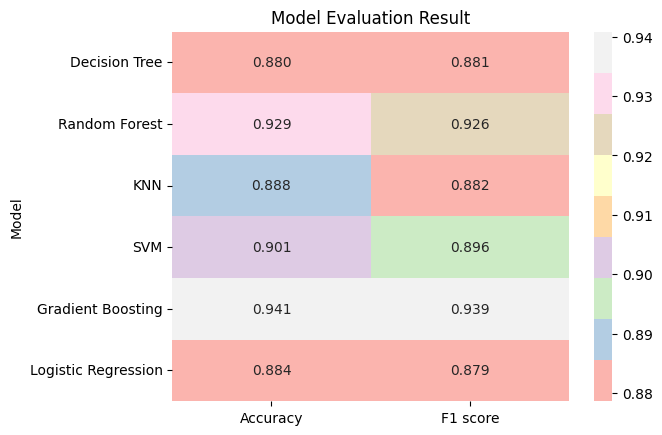

In [73]:
sns.heatmap(data=summary_table.set_index('Model').iloc[:,:], annot=True, fmt='.3f', cmap='Pastel1')
plt.title('Model Evaluation Result')
plt.show()

# 결론
- 튜닝 전후로 어떤 모델이 성능이 좋았는지 결론 작성

기본적으로는 Gradient Boosting의 정확도(0.941)가 가장 높게 나왔다.
그 다음으로는 Random Forest, Decision Tree, KNN, SVM 순으로 나왔다.

이상치 처리의 유무에 따라 모델 정확도 순위가 일부 변동이 있긴 하였지만 크게 변화가 없었다.

그리고 앙상블한 결과가 예상되듯 가장 높은 정확도를 보였다.
Voting Accuracy Score :0.9467